# 📦 Project: The Shipping Crisis (Saudi Retail Case Study)
## 📋 The Scenario
You have been hired by a major Saudi-based e-commerce platform. Management has noticed a significant decline in customer satisfaction scores. Initial reports suggest that a massive number of packages are not reaching customers on time.

**The Management's Question:**
*"We are losing money and customers. We need to know: Is this a logistics problem (Mode of Shipment), a product problem (Weight/Cost), or a strategy problem (Discounts/Priority)? Find the root cause and build a system to save our customers."*

## Phase 1: Data Understanding
In this phase, explore the `Saudi_Retail_Logistics_Data.csv` to find out **why** delays are happening.

* **Step 1.1:** Load the dataset.
* **Step 1.2:** Perform statistical profiling (`.describe()`, `.info()`).
* **Step 1.3:** Create visualizations (Histograms/Scatter) to find the problem.

| Feature Name         | Type       | Description                                                                 | Values / Examples                               |
| :------------------- | :--------- | :-------------------------------------------------------------------------- | :--------------------------------------------- |
| Tracking_ID          | String     | A unique, encrypted alphanumeric identifier for each shipment.              | E3B0C44298FC, 1C2D3E4F5G6H                     |
| Warehouse_Zone       | Categorical| The regional distribution hub handling the order.                           | North_Hub, South_Hub, East_Hub, West_Hub, Central_Port |
| Mode_of_Shipment     | Categorical| The logistics method used to transport the product.                         | Premium_Air, Standard_Sea, Ground_Freight      |
| Customer_Inquiries   | Integer    | Number of times the customer contacted support regarding this order.        | 2, 3, 4, etc.                                  |
| Customer_Score       | Integer    | The rating provided by the customer to the store before shipment (1 is lowest, 5 is highest).            | 1, 2, 3, 4, 5                                  |
| Product_Cost_SAR     | Float      | The value of the item in Saudi Riyals (SAR).                                | 450.00, 1125.50, etc.                          |
| Previous_Orders      | Integer    | Number of successful orders this customer has placed previously.            | 0, 1, 2, 3, etc.                               |
| Product_Priority     | Categorical| The priority level assigned to the product for dispatch.                    | low, medium, high                              |
| Gender               | Categorical| The gender of the customer.                                                 | F, M                                           |
| Discount_offered     | Integer    | The discount amount applied to this specific order.                         | 1, 10, 65, etc.                                |
| Product_Weight_g     | Integer    | The weight of the package in grams.                                         | 1200, 4500, etc.                               |
| is_delayed           | Binary     | Target Variable: Indicates if the shipment arrived past the deadline.       | 1 (Delayed), 0 (On Time)                       |

coustmer inquires , is_delayed ?


In [23]:
# imports
from pathlib import Path
import pandas as pd
# load data
local_file = Path('Saudi_Retail_Logistics_Data.csv')

if not local_file.exists():
    print("Downloading data...")
    df = pd.read_csv('https://drive.google.com/uc?export=download&id=1vayY_XKPwe5lOaq0VNia22O4DkDVXmzv')
    df.to_csv(local_file, index=False)
else:
    print("Loading data from cache...")
    df = pd.read_csv(local_file)
df.head()

Loading data from cache...


,Tracking_ID,Warehouse_Zone,Mode_of_Shipment,Customer_Inquiries,Customer_Score,Product_Cost_SAR,Previous_Orders,Product_Priority,Gender,Discount_offered,Product_Weight_g,is_delayed
0,D66B138C54AB,West_Hub,Ground_Freight,4,1,978.75,2,medium,F,9,4158,0
1,8FF9538E65E6,Central_Port,Standard_Sea,3,3,607.50,2,low,F,26,1659,1
2,D098284FA376,South_Hub,Standard_Sea,3,2,828.75,2,medium,M,9,4466,0
3,9202E9FDFF40,West_Hub,Standard_Sea,3,5,588.75,4,medium,F,2,4640,0
4,16B30490A644,North_Hub,Premium_Air,2,5,1020.00,2,low,M,24,3638,1


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Inquiries,8799.0,4.049096,1.138649,2.0,3.0,4.0,5.00,7.0
Customer_Score,8799.0,2.997386,1.411194,1.0,2.0,3.0,4.00,5.0
Product_Cost_SAR,8799.0,788.363877,180.192439,360.0,637.5,802.5,941.25,1162.5
Previous_Orders,8799.0,3.581998,1.532722,2.0,3.0,3.0,4.00,10.0
Discount_offered,8799.0,13.366974,16.147015,1.0,4.0,7.0,10.00,65.0
Product_Weight_g,8799.0,3631.227867,1634.180615,1001.0,1838.0,4140.0,5045.00,7846.0
is_delayed,8799.0,0.596659,0.490596,0.0,0.0,1.0,1.00,1.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8799 entries, 0 to 8798
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tracking_ID         8799 non-null   object 
 1   Warehouse_Zone      8799 non-null   object 
 2   Mode_of_Shipment    8799 non-null   object 
 3   Customer_Inquiries  8799 non-null   int64  
 4   Customer_Score      8799 non-null   int64  
 5   Product_Cost_SAR    8799 non-null   float64
 6   Previous_Orders     8799 non-null   int64  
 7   Product_Priority    8799 non-null   object 
 8   Gender              8799 non-null   object 
 9   Discount_offered    8799 non-null   int64  
 10  Product_Weight_g    8799 non-null   int64  
 11  is_delayed          8799 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 825.0+ KB


### EDA

In [26]:
df.isnull().sum()

Tracking_ID           0
Warehouse_Zone        0
Mode_of_Shipment      0
Customer_Inquiries    0
Customer_Score        0
Product_Cost_SAR      0
Previous_Orders       0
Product_Priority      0
Gender                0
Discount_offered      0
Product_Weight_g      0
is_delayed            0
dtype: int64

In [27]:
df['is_delayed'].value_counts(normalize=True)


is_delayed
1    0.596659
0    0.403341
Name: proportion, dtype: float64

In [28]:
import plotly.express as px
df_a=df.groupby('is_delayed', as_index=False)['is_delayed'].count()
fig = px.bar(df_a, x="is_delayed",
                 title="is_delayed")
fig.show()

In [29]:
import plotly.figure_factory as ff

# Select numeric columns only
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_cols].corr().round(2)

# Create annotated heatmap
fig = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns.tolist(),
    y=corr_matrix.index.tolist(),
    colorscale='Viridis',
    showscale=True
)

fig.update_layout(
    title='Correlation Heatmap of Numeric Features',
    width=1100,
    height=900
)

fig.show()


##### As shown in the figure above, the heatmap provides a visual overview of the relationships and correlations between all columns. From this visualization, we can identify several notable patterns:

###### -The **is_delayed** column shows a strong correlation with Discount_offered, indicating that discounted shipments may have a higher likelihood of being delayed.

###### -**Customer_Inquirie** is highly correlated with Product_Cost_SAR, suggesting that customers tend to contact support more often for expensive products.

###### -**Customer_Score** is also correlated with both product price and the number of inquiries, which highlights the impact of product pricing and service quality on customer satisfaction.

Overall, the heatmap not only helps us understand factors affecting delays but also provides insights into how product pricing, service interactions, and customer satisfaction are interconnected, giving a broader perspective beyond just shipment delays.

(0.0, 1.0)

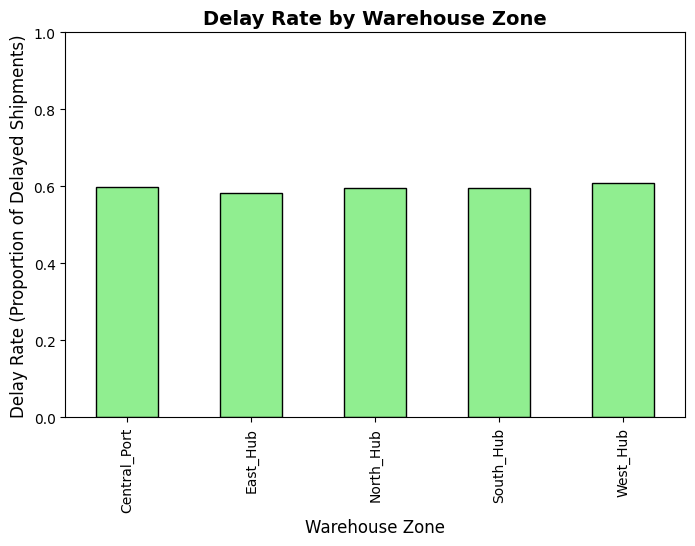

In [30]:
# Aggregate data
zone_delays = df.groupby('Warehouse_Zone')['is_delayed'].mean()

# Plot
ax = zone_delays.plot(kind='bar', color='lightgreen', edgecolor='black', figsize=(8,5))

# Add axis labels and title
ax.set_xlabel('Warehouse Zone', fontsize=12)
ax.set_ylabel('Delay Rate (Proportion of Delayed Shipments)', fontsize=12)
ax.set_title('Delay Rate by Warehouse Zone', fontsize=14, fontweight='bold')
ax.set_ylim(0,1)  # proportion


##### As shown in the figure above, the bar chart represents the delay rate (is_delayed) for each Warehouse_Zone. From this visualization, we can see that most zones have relatively similar delay rates, except for the West_Hub, which has the highest proportion of delayed shipments.

##### This insight indicates that the West_Hub may be a key bottleneck in the logistics process. Investigating the operations, staffing, or workflow in this warehouse could help reduce overall delays and improve delivery performance across the platform

In [31]:
import plotly.express as px

# Aggregate: mean inquiries per delay category
agg_df = df.groupby('is_delayed')['Customer_Inquiries'].mean().reset_index()

fig = px.bar(
    agg_df,
    x='is_delayed',
    y='Customer_Inquiries',
    color='is_delayed',
    labels={'is_delayed':'Is Delayed', 'Customer_Inquiries':'Average Customer Inquiries'},
    title='Average Customer Inquiries vs Shipment Delay'
)
fig.show()


#####  As shown in the figure above, the bar chart represents the is_delayed column and the average number of customer inquiries for both delayed and on-time shipments. From this visualization, we can observe that customer inquiries are not always high just because a shipment is delayed.

##### This suggests that there may be other factors contributing to increased customer support requests, beyond shipment delays. Identifying these factors can help the company improve customer service and support, ensuring that customers’ questions and concerns are addressed more efficiently

In [32]:
counts = df.groupby(["Mode_of_Shipment", 'is_delayed']).size().reset_index(name='count')
fig = px.bar(counts, x='Mode_of_Shipment', y='count', color='is_delayed',
                 barmode='group',
                 title=f"mode of shipmet vs delay")
fig.show()

#####  As shown in the figure above, the bar chart represents the is_delayed column and the mode of shipment.
##### we notice that there is no significant change in delayed orders in any specific mode of shipment. 

In [33]:
counts = df.groupby(['Gender', 'is_delayed']).size().reset_index(name='count')
fig = px.bar(counts, x='is_delayed', y='count', color='Gender',
                 barmode='group',
                 title=f"Gender vs delay")
fig.show()

#####  As shown in the figure above, the bar chart represents the is_delayed column and the Gender.
##### we notice that there is no significant change in delayed orders in any specific Gender. 

In [34]:
fig = px.histogram(df, x="Discount_offered",color="is_delayed",
    barmode="stack")
fig.show()

##### we notice a strong relation between the amount of dicount offered and the delays. 
##### if the discount total is more that 10, all orders are delayed. 
##### which indicates that the more discount is applyed, the more load on the shipment company.

In [35]:
fig = px.histogram(df, x="Product_Weight_g",color="is_delayed",
    barmode="stack")
fig.show()

Product Weight vs. Delay Status (stacked histplot)
Insight: The stacked bars reveal that as product weight increases, the proportion of delayed shipments (green) grows significantly. Specifically, packages in the 4,000g to 8,000g range have the highest delay counts.

Deduction: This is a Logistics/Product Problem. Heavier items may require specialized handling, larger vehicle space, or different sorting belts that are currently less efficient than those used for lighter parcels.

## Phase 2: Feature Engineering & Baseline
Prepare the data for Machine Learning.

-Proactive Notifications: Inform customers in advance if their order may be delayed.

-Enhanced Logistics: Prioritize high-weight or high-value shipments and optimize operations in bottleneck hubs like West_Hub.

-Customer Loyalty Program: Reward repeat customers and provide priority handling for high-value segments.

-ML Predictive Model: Predict delayed shipments using features like shipping mode, warehouse, product weight, and customer history to act proactively.



In [36]:
from sklearn.model_selection import train_test_split

# Drop irrelevant columns
X = df.drop(columns=['Tracking_ID','is_delayed'])
y = df['is_delayed']


In [37]:



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Phase 3: Training, Evaluation & Strategy
Build your solution and define your business interventions.

* **Step 3.1:** Train a Classifier.
* **Step 3.2:** Generate a Classification Report and Confusion Matrix.
* **Step 3.3:** **CRITICAL:** List 3 business solution will save our customers based on your model (you can use a 5% Coupon).

In [38]:
from pycaret.classification import setup, create_model, tune_model, save_model

clf = setup(
    data=X_train,
    target=y_train,
    normalize=True,
    transformation=True,
    feature_selection=True,
    session_id=42
)

# # Create SVM model
# svm_model = create_model('svm')

# # (Optional) Tune SVM for better performance
# tuned_svm = tune_model(svm_model, optimize='F1')

# # Save the trained SVM + preprocessing pipeline



# save_model(tuned_svm, 'svm_is_delayed_model')


[LightGBM] [Info] Number of positive: 2940, number of negative: 1987
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 586
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.596712 -> initscore=0.391784
[LightGBM] [Info] Start training from score 0.391784


,Description,Value
0,Session id,42
1,Target,is_delayed
2,Target type,Binary
3,Original data shape,"(7039, 11)"
4,Transformed data shape,"(7039, 3)"
5,Transformed train set shape,"(4927, 3)"
6,Transformed test set shape,"(2112, 3)"
7,Numeric features,6
8,Categorical features,4
9,Preprocess,True


In [39]:

from pycaret.classification import *
from sklearn.metrics import confusion_matrix
import pandas as pd

top_models = compare_models(n_select=10)


def get_cm_values(model_list):
    results = []
    for model in model_list:
        preds = predict_model(model)

        cm = confusion_matrix(preds['is_delayed'], preds['prediction_label'])
        tn, fp, fn, tp = cm.ravel()

        total_values = (tp * 75.00) + (fp * -18.75) + (fn * -187.50)

        results.append({
            'Model_Name': str(model).split('(')[0],
            'TP': tp,
            'TN': tn,
            'FP': fp,
            'FN': fn,
            'Custom_Score': total_values,
            'Model_Object': model  # IMPORTANT!!
        })

    return pd.DataFrame(results)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6688,0.7319,0.5466,0.8452,0.6631,0.3652,0.4000,0.4790
ada,Ada Boost Classifier,0.6466,0.7333,0.7204,0.6977,0.7087,0.2598,0.2602,0.3970
lightgbm,Light Gradient Boosting Machine,0.6432,0.7102,0.6204,0.7400,0.6748,0.2862,0.2918,0.3990
dt,Decision Tree Classifier,0.6399,0.6265,0.6980,0.6987,0.6981,0.2519,0.2522,0.3550
nb,Naive Bayes,0.6389,0.6708,0.7874,0.6673,0.7223,0.2160,0.2225,0.2760
ridge,Ridge Classifier,0.6371,0.6668,0.7799,0.6677,0.7193,0.2144,0.2200,0.3480
lda,Linear Discriminant Analysis,0.6365,0.6668,0.7728,0.6692,0.7171,0.2157,0.2204,0.3250
lr,Logistic Regression,0.6363,0.6657,0.7816,0.6664,0.7193,0.2117,0.2176,3.8340
knn,K Neighbors Classifier,0.6351,0.7086,0.6643,0.7067,0.6847,0.2525,0.2533,0.4150
rf,Random Forest Classifier,0.6332,0.7142,0.6667,0.7034,0.6844,0.2474,0.2480,0.6150


In [40]:
df_models = get_cm_values(top_models)

# Sort and get the highest scoring model (not just the row)
best_row = df_models.sort_values(by='Custom_Score', ascending=False).iloc[0]
best_model = best_row['Model_Object']  # <- This is the model you want


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6705,0.7490,0.5468,0.8464,0.6644,0.3689,0.4033


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.6397,0.7289,0.7183,0.6903,0.7040,0.2441,0.2444


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.6671,0.7390,0.6381,0.7650,0.6958,0.3349,0.3416


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.6482,0.6307,0.7198,0.6993,0.7094,0.2640,0.2641


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.6278,0.6677,0.7881,0.6567,0.7165,0.1879,0.1947


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.6340,0.5967,0.7897,0.6620,0.7202,0.2028,0.2095


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.6335,0.6629,0.7841,0.6631,0.7185,0.2038,0.2098


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6364,0.6618,0.7921,0.6636,0.7221,0.2078,0.2147


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.6529,0.7305,0.6905,0.7172,0.7036,0.2853,0.2856


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6501,0.7354,0.6794,0.7187,0.6985,0.2825,0.2831


In [41]:
best_row

Model_Name                                     LogisticRegression
TP                                                            998
TN                                                            346
FP                                                            506
FN                                                            262
Custom_Score                                              16237.5
Model_Object    LogisticRegression(C=1.0, class_weight=None, d...
Name: 7, dtype: object

In [42]:
test_predictions = predict_model(best_model, data=X_test)
test_predictions.head()



,Warehouse_Zone,Mode_of_Shipment,Customer_Inquiries,Customer_Score,Product_Cost_SAR,Previous_Orders,Product_Priority,Gender,Discount_offered,Product_Weight_g,prediction_label,prediction_score
496,South_Hub,Ground_Freight,4,4,765.00,3,medium,M,8,5614,0,0.5661
272,East_Hub,Premium_Air,4,5,588.75,3,medium,M,10,5898,0,0.5271
256,South_Hub,Ground_Freight,4,4,780.00,2,high,F,20,2759,1,0.6862
1419,East_Hub,Standard_Sea,4,4,738.75,2,medium,F,1,5211,0,0.5196
3684,Central_Port,Standard_Sea,5,4,510.00,3,medium,M,4,5413,1,0.5445


### 📝 Business Strategy Recommendations
1.Proactive Notifications: Inform customers in advance if their order may be delayed.

2.Enhanced Logistics: Prioritize high-weight or high-value shipments and optimize operations in bottleneck hubs like West_Hub.

3.Customer Loyalty Program: Reward repeat customers and provide priority handling for high-value segments.

4.ML Predictive Model: Predict delayed shipments using features like shipping mode, warehouse, product weight, and customer history to act proactively.


 
 

## Phase 4: The Business Value Calculator
Calculate the SAR impact of your model using the following values:
* **+ SAR 75.00**: True Positive (Saved Customer)
* **- SAR 18.75**: False Positive (5% Wasted Coupon)
* **- SAR 187.50**: False Negative (Lost Lifetime Value)

In [44]:
# Calculate and print the Total Business Value in SAR
print(f"{best_row['Custom_Score']} SAR")

16237.5 SAR
